In [1]:
import scipy.io
import scipy.signal
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq, irfft, ifft, rfft, rfftfreq
from scipy.ndimage import gaussian_filter
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.sparse import linalg
from numpy.linalg import norm
import zipfile
import shutil

In [2]:
# fzip = zipfile.ZipFile("h.zip")
# fzip.extractall('./')

In [3]:
#dataPath = 'h/'
dataPath = 'ЛПП мышей/h/'

In [4]:
folders = os.listdir(path=dataPath)
filenames = [dataPath+folder+'/'+filename for folder in folders for filename in os.listdir(path=dataPath+folder)]

In [5]:
records = [scipy.io.loadmat(filename) for filename in filenames]
traces1 = [record[[*record.keys()][-3]] for record in records]
traces2 = [record[[*record.keys()][-2]] for record in records]
traces3 = [record[[*record.keys()][-1]] for record in records]

In [6]:
h100 = []
h200 = []
h300 = []
h400 = []
h500 = []
h1000 = []
for i in range(len(filenames)):
    if ' h 100 ' in filenames[i] or ' h 100.' in filenames[i] or ' healthy 100 ' in filenames[i] or ' healthy 100.' in filenames[i]:
        h100.append(filenames[i])
    if ' h 200 ' in filenames[i] or ' h 200.' in filenames[i] or ' healthy 200 ' in filenames[i] or ' healthy 200.' in filenames[i]:
        h200.append(filenames[i])
    if ' h 300 ' in filenames[i] or ' h 300.' in filenames[i] or ' healthy 300 ' in filenames[i] or ' healthy 300.' in filenames[i]:
        h300.append(filenames[i])
    if ' h 400 ' in filenames[i] or ' h 400.' in filenames[i] or ' healthy 400 ' in filenames[i] or ' healthy 400.' in filenames[i]:
        h400.append(filenames[i])
    if ' h 500 ' in filenames[i] or ' h 500.' in filenames[i] or ' healthy 500 ' in filenames[i] or ' healthy 500.' in filenames[i]:
        h500.append(filenames[i])
    if ' h 1000 ' in filenames[i] or ' h 1000.' in filenames[i] or ' healthy 1000 ' in filenames[i] or ' healthy 1000.' in filenames[i]:
        h1000.append(filenames[i])

In [7]:
records100 = [scipy.io.loadmat(filename) for filename in h100]

In [8]:
def artefact_clean(signals, n):

  center = np.median(np.concatenate((np.argmax(signals, axis=1), np.argmin(ca3100, axis=1)))).astype('int')
  norm_all_signals = np.array([(signals[i] - signals[i].mean())/signals[i].std() for i in range(52)])
  #stds = np.array([signals[i].std() for i in range(52)])

  for i in range(52):
      flag = False
      for j in range(center-100, center+100):
          #print(j)
          if np.abs(norm_all_signals[i][j]) > n:
              norm_all_signals[i][j-20: j+20] = norm_all_signals[i][j-70: j-30]
              flag=True
              break
      if not flag:
         norm_all_signals[i][center-20: center+20] = norm_all_signals[i][center-70: center-30]

  return norm_all_signals, center

In [9]:
def high_noise_remove(signals, center):
  for i in range(52):
      for j in range(len(signals[i])):
          if j not in range(center - 1000, center + 1000) and np.abs(signals[i][j]) > 6:
              signals[i][j-50: j+50] = signals[i][j-200: j-100]
              #print(i, j)

  return signals

In [10]:
def plot(signal, signal_without_art, center):
  fig = plt.figure(figsize=(16, 9))

  ax_1 = fig.add_subplot(2, 1, 1)
  ax_2 = fig.add_subplot(2, 1, 2)
  ax_1.set_title('input signal')
  ax_1.plot(signal[center - 100: center + 1000])
  ax_2.set_title('removed artefact')
  ax_2.plot(signal_without_art[center - 100: center + 1000])
  plt.show()

In [11]:
ca1100 = []
for rec in records100:
    for k in rec.keys():
        if str(k).endswith('_2'):
            ca1100.append(rec[str(k)][:,1])
ca1100 = np.array(ca1100)
ca3100 = []
for rec in records100:
    for k in rec.keys():
        if str(k).endswith('_3'):
            ca3100.append(rec[str(k)][:,1])
ca3100 = np.array(ca3100)

In [12]:
norm_all_ca1100, center_ca1100 = artefact_clean(ca1100, 8)

In [13]:
norm_all_ca1100 = high_noise_remove(norm_all_ca1100, center_ca1100)

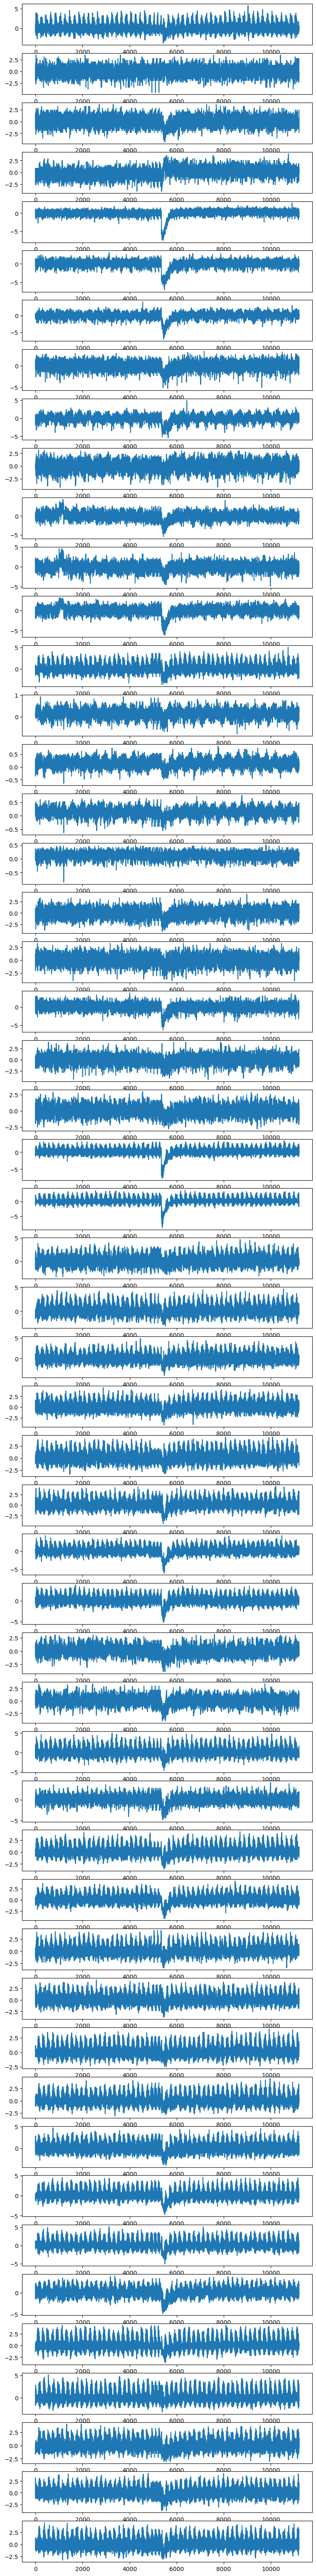

In [166]:
fig = plt.figure(figsize=(9, 80))

for i in range(52):
    
    ax = fig.add_subplot(52, 1, i+1)
    ax.plot(norm_all_ca1100[i])
    

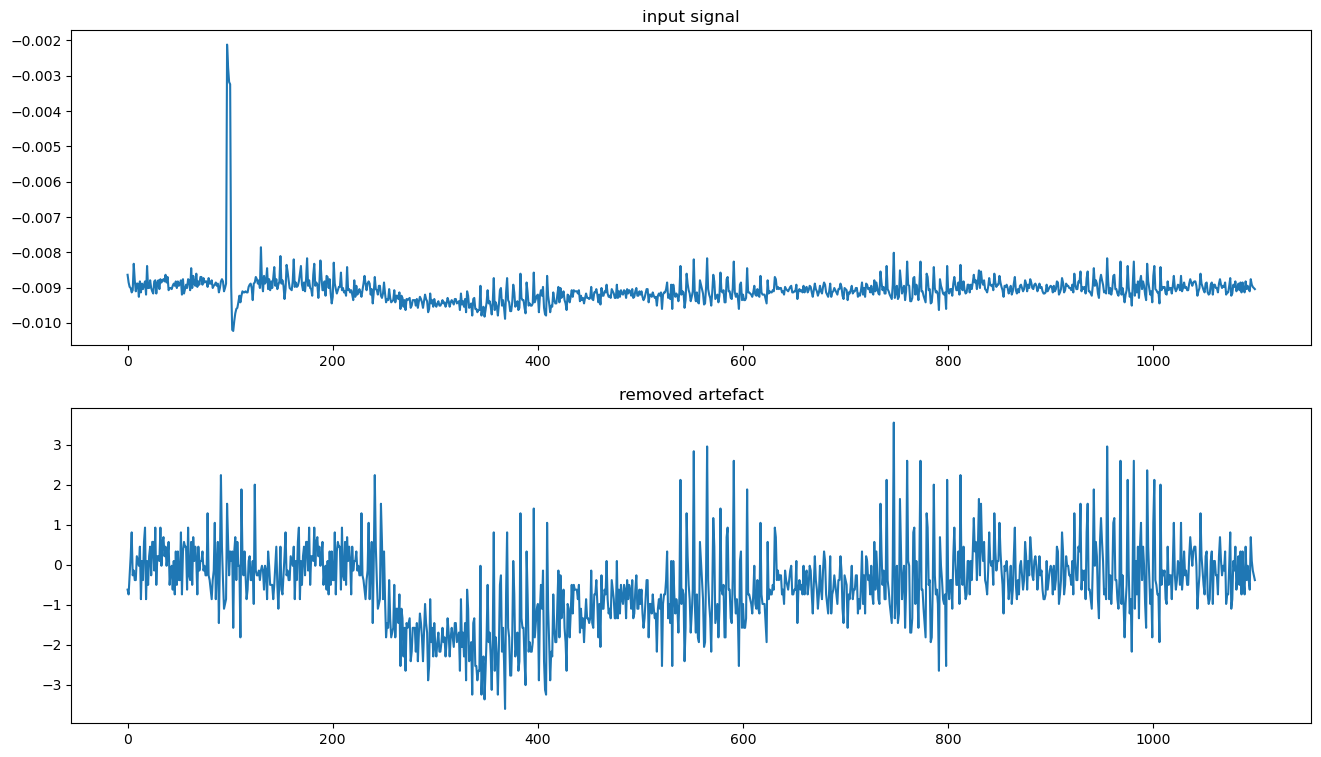

In [168]:
k = 37
plot(ca1100[k], norm_all_ca1100[k], center_ca1100)

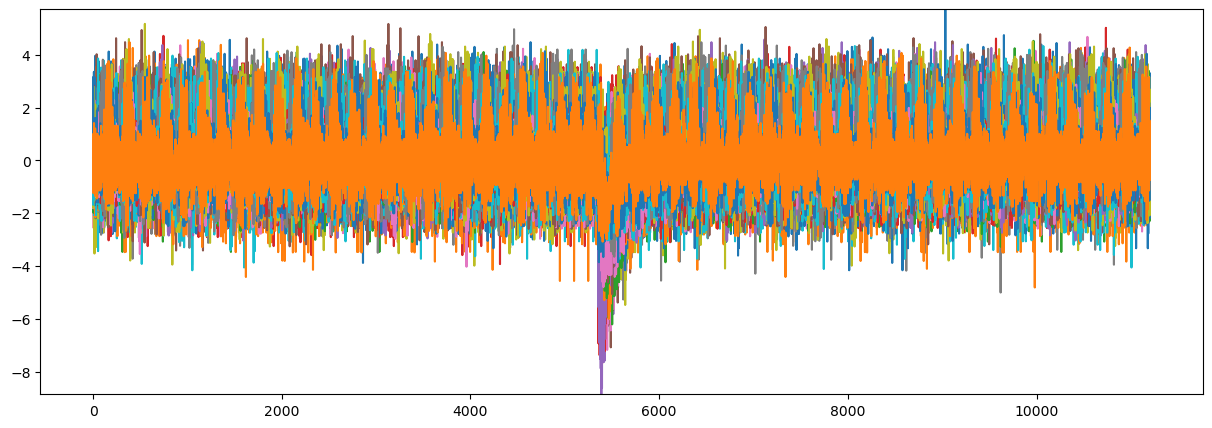

In [169]:
plt.figure(figsize=(15, 5))
plt.ylim([np.min(norm_all_ca1100), np.max(norm_all_ca1100)])

for i in range(52):
    plt.plot(norm_all_ca1100[i])
plt.show()

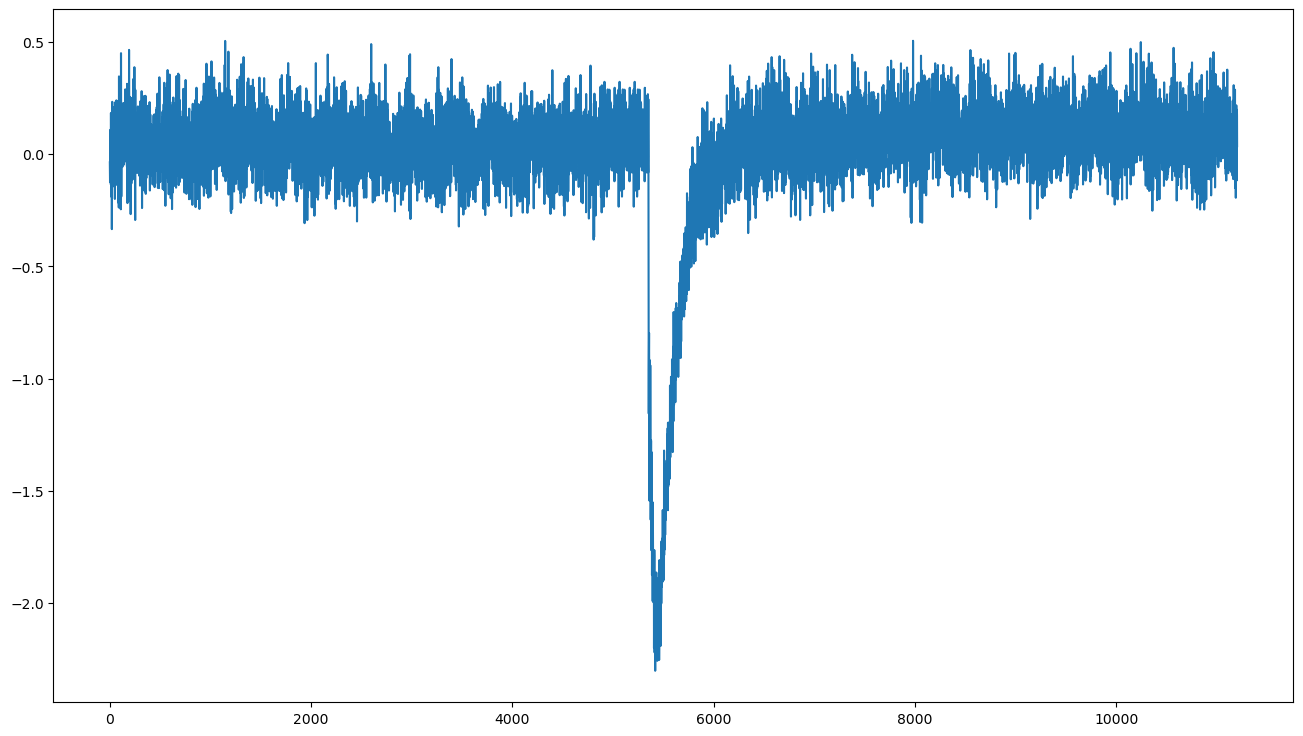

In [170]:
plt.figure(figsize=(16, 9))
plt.plot(norm_all_ca1100.mean(axis=0))

In [ ]:
norm_all_ca3100, center_ca3100 = artefact_clean(ca3100)


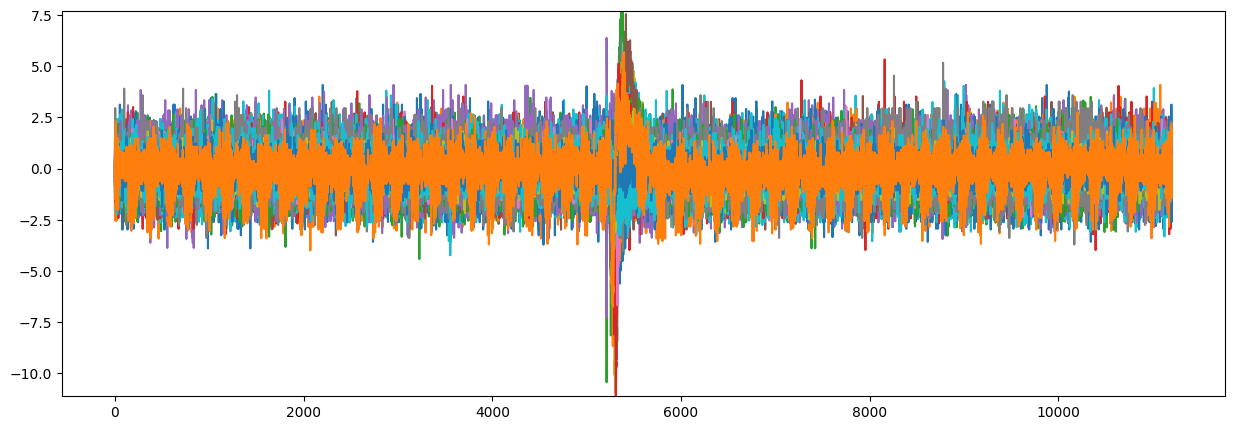

In [ ]:
plt.figure(figsize=(15, 5))
plt.ylim([np.min(norm_all_ca3100), np.max(norm_all_ca3100)])

for i in range(52):
    plt.plot(norm_all_ca3100[i])
plt.show()

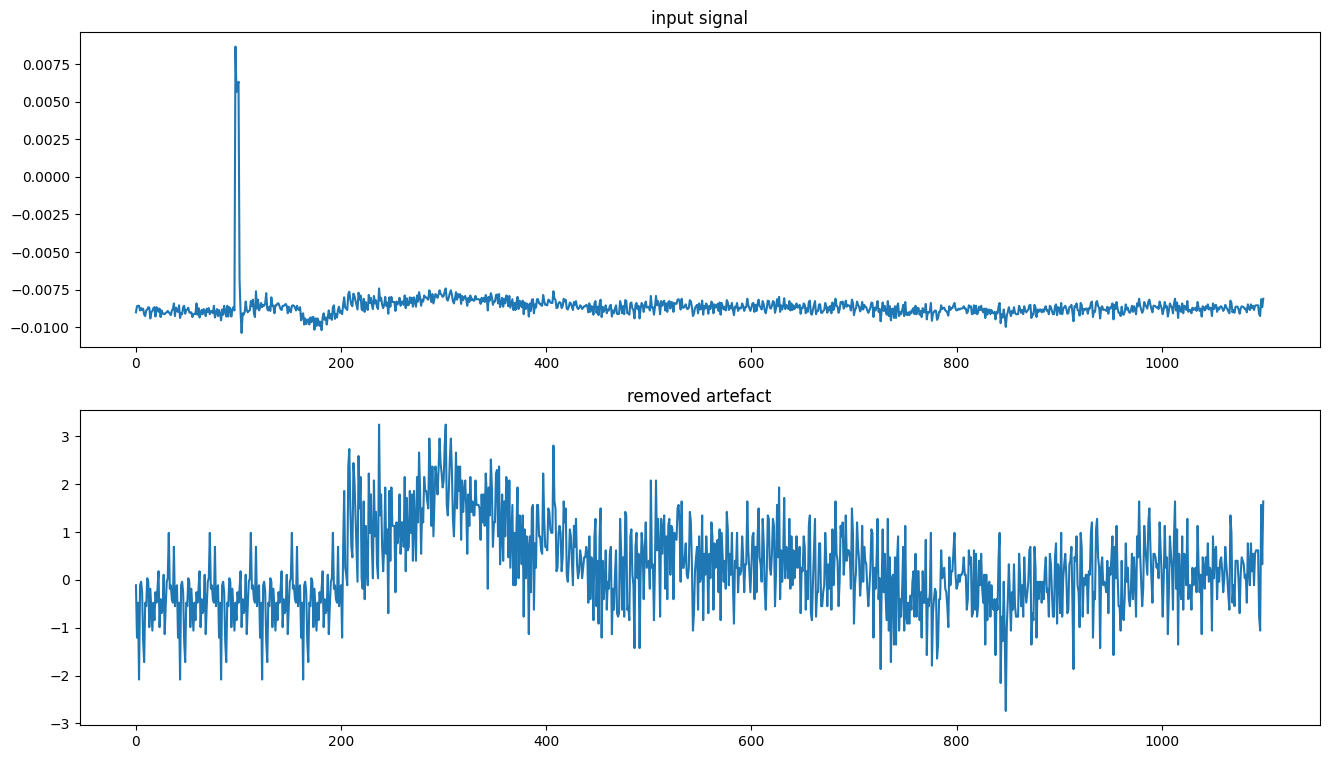

In [ ]:
k = 1
plot(ca3100[k], norm_all_ca3100[k], center_ca3100)

In [ ]:
for i

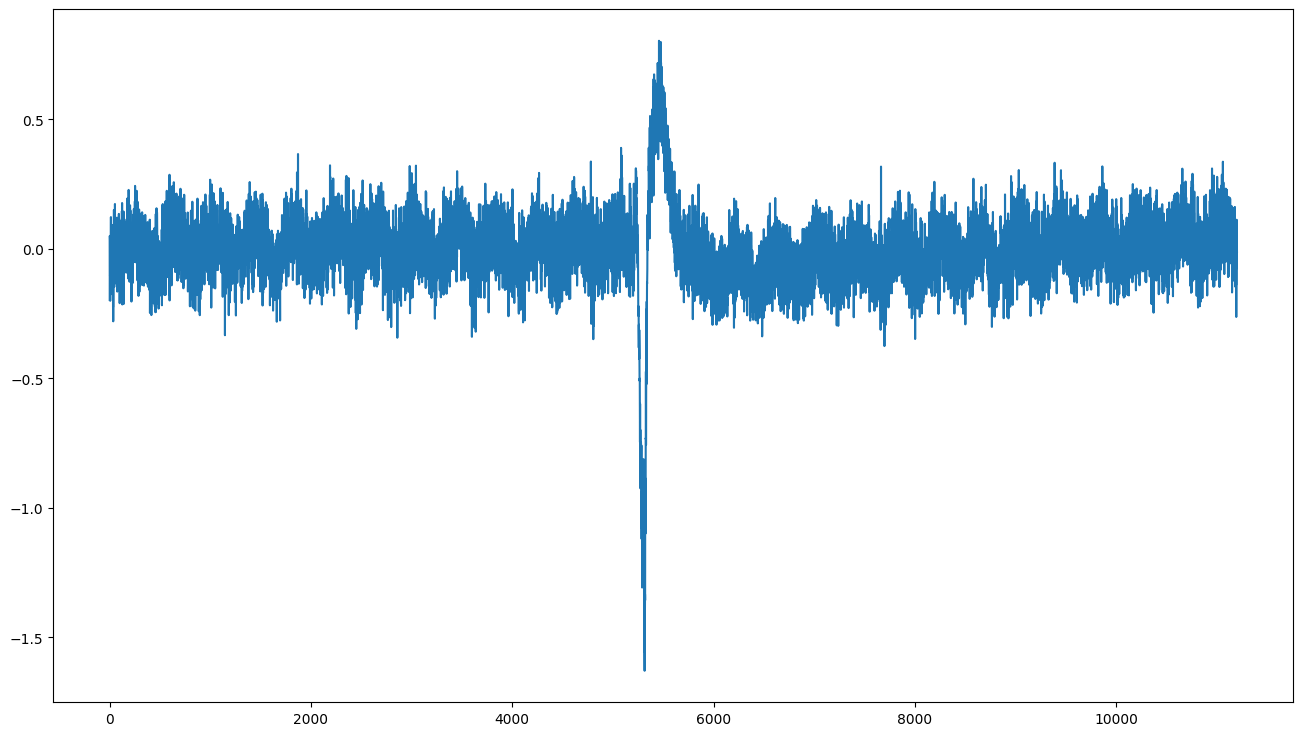

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(norm_all_ca3100.mean(axis=0))

In [ ]:
for i in range(52):
    if np.max(np.abs(norm_all_ca3100[i])) > 5:
        print(i)

4
6
9
15
17
18
22
23
25
33
40
41
43
46
47
51


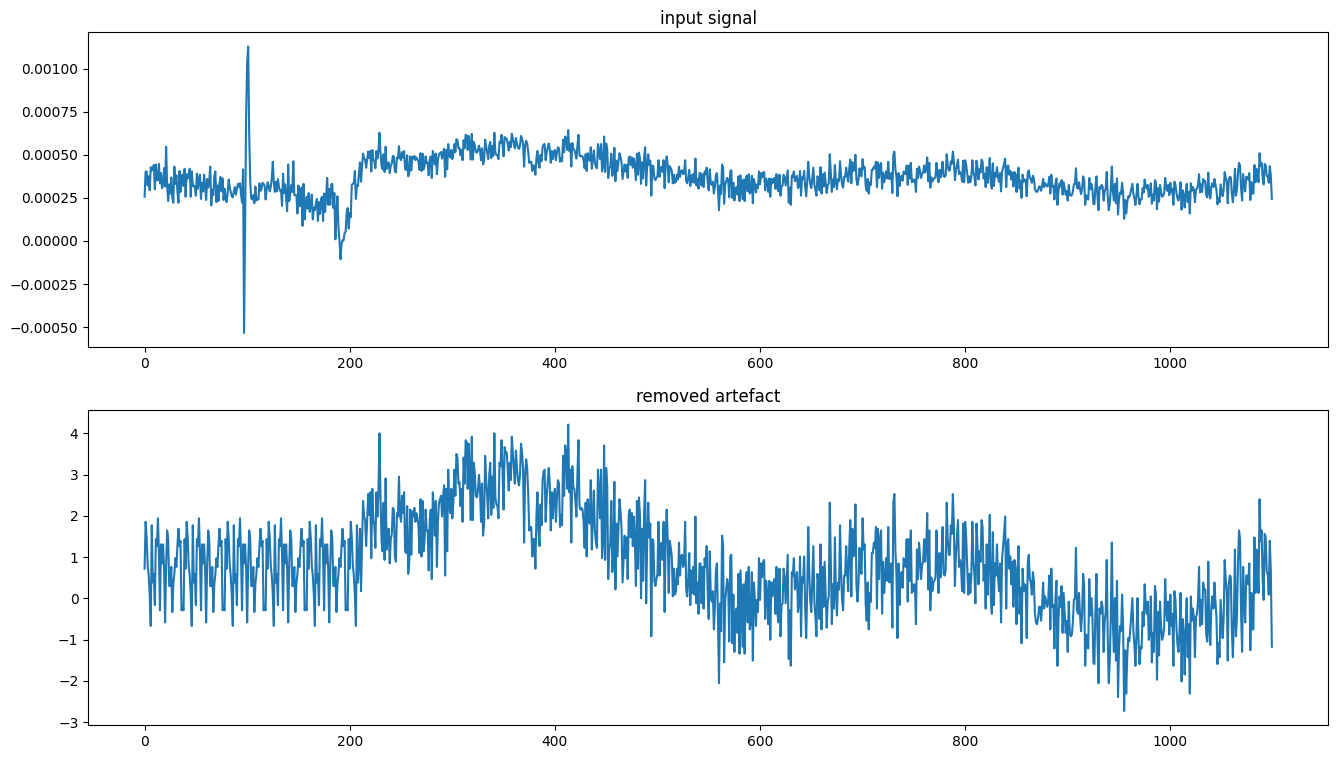

In [ ]:
k = 19
plot(ca3100[k], norm_all_ca3100[k], center_ca3100)

### Регрессия

In [171]:
y = norm_all_ca1100[:, center_ca1100:center_ca1100 + 1000]

In [172]:
y.shape

(52, 1000)

In [173]:
x = list(range(1000))
x = np.array(x) / 1000
x = np.expand_dims(x, axis=1)

In [174]:
x.shape

(1000, 1)

In [175]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=20)
X_poly = poly.fit_transform(x).astype("float16")

preds = np.zeros((1000, 1))
for i in range(len(y)):
    lin2 = LinearRegression()
    poly.fit(X_poly, y[i])
    lin2.fit(X_poly, np.expand_dims(y[i], axis=1))
    preds += lin2.predict(X_poly)
preds /= len(y)

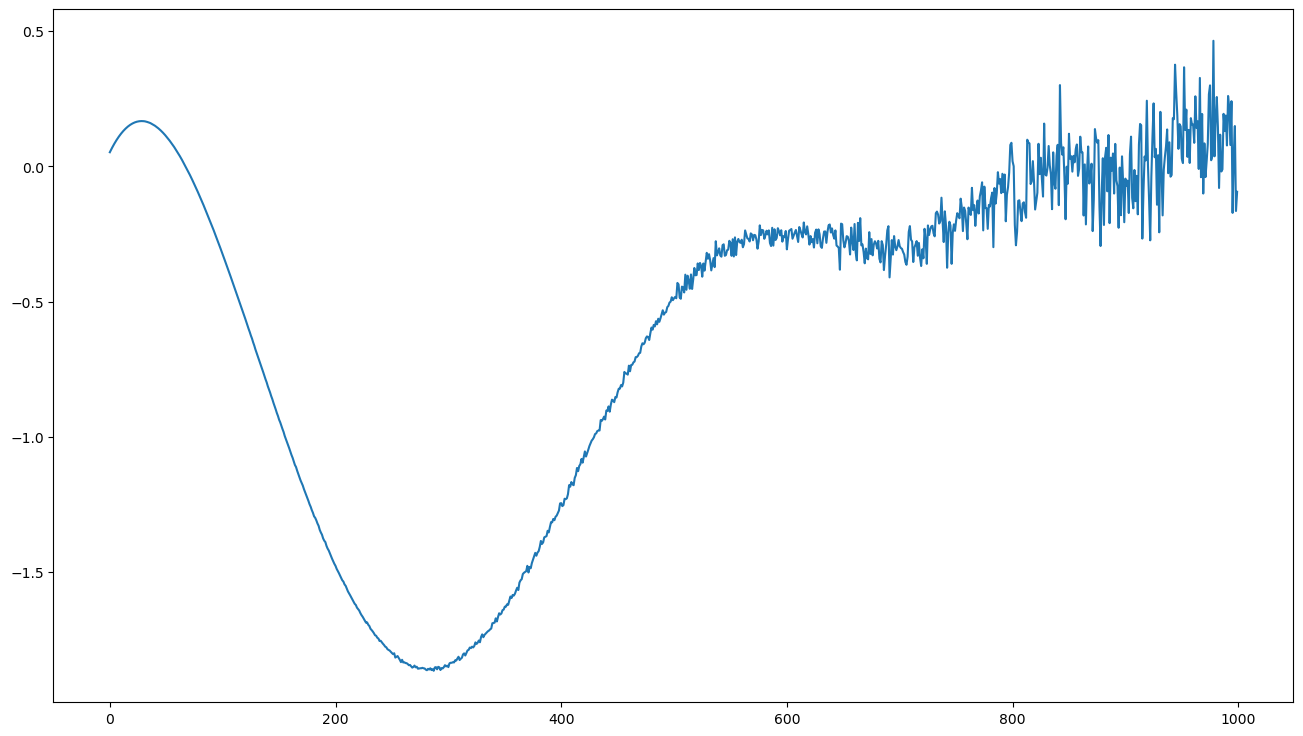

In [176]:
plt.figure(figsize=(16, 9))
plt.plot(preds)

In [177]:
preds[500:] = gaussian_filter(preds[500:], sigma=5, radius=50)

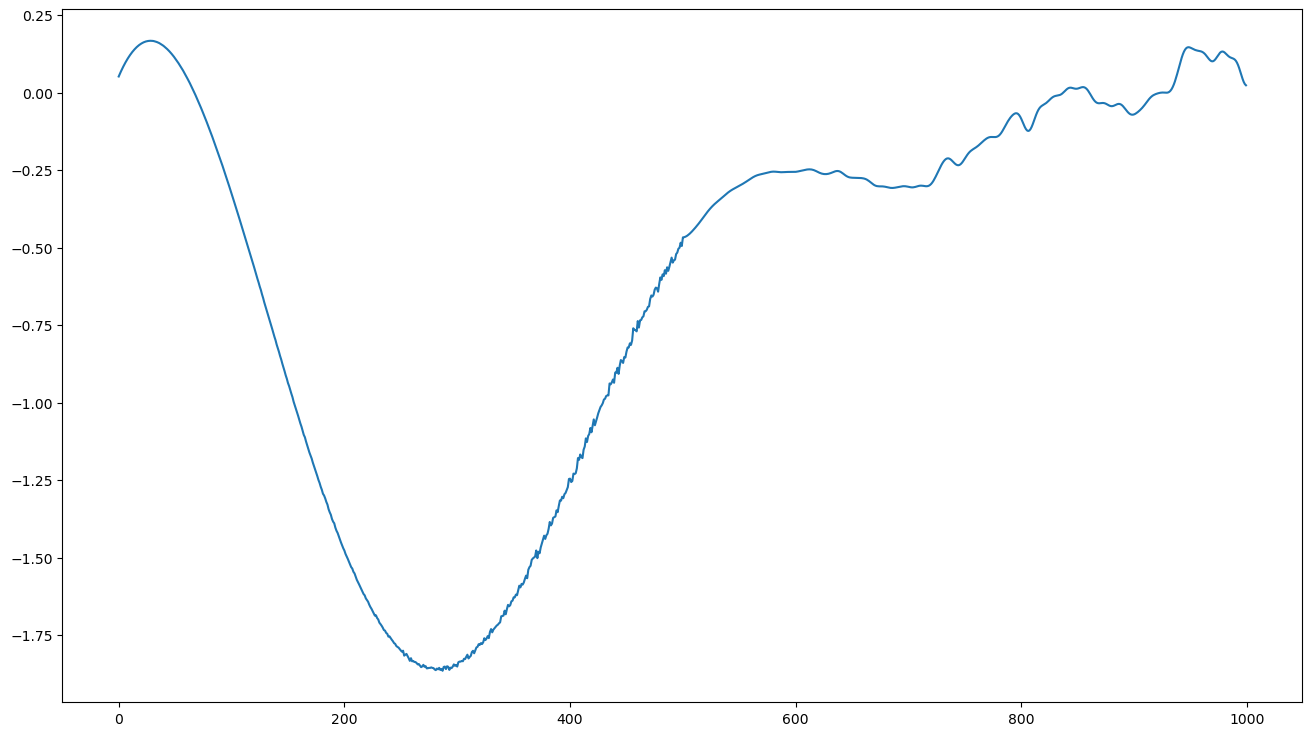

In [178]:
plt.figure(figsize=(16, 9))
plt.plot(preds)

In [179]:
mean_signal = norm_all_ca1100.mean(axis=0)

In [180]:
fil_mean_signal = gaussian_filter(mean_signal, sigma=100, radius=500)

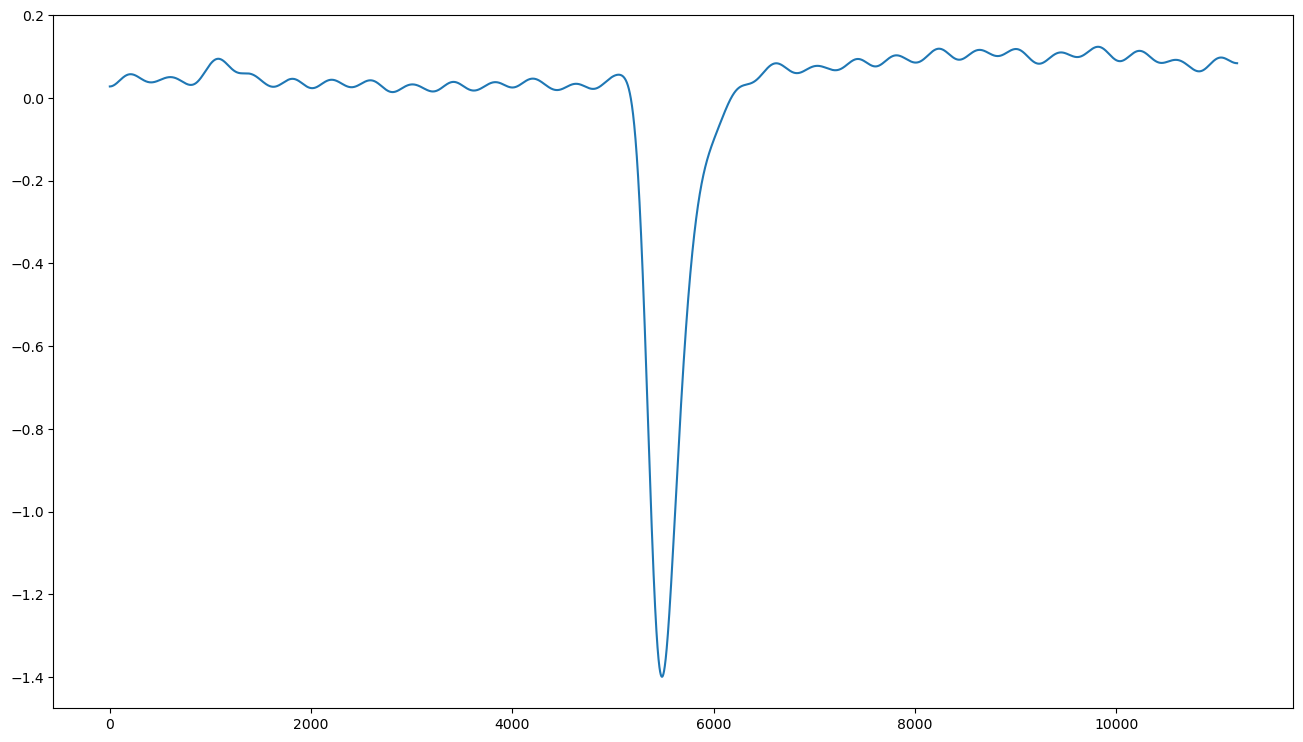

In [181]:
plt.figure(figsize=(16, 9))
plt.plot(fil_mean_signal)

In [182]:
fil_mean_signal[center_ca1100:center_ca1100 + 1000] = preds[:, 0]

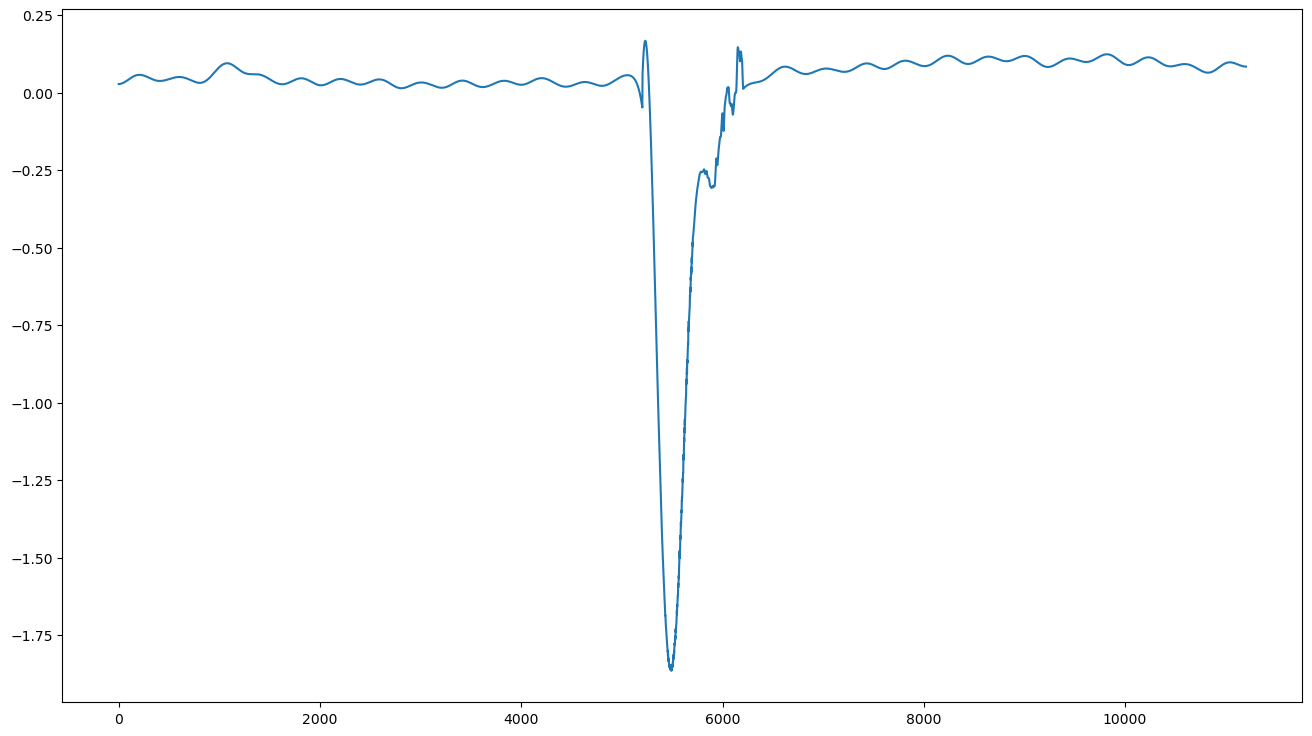

In [183]:
plt.figure(figsize=(16, 9))
plt.plot(fil_mean_signal)

## CA3

In [212]:
center_ca3100

5204

In [239]:
norm_all_ca3100, center_ca3100 = artefact_clean(ca3100, 5)
norm_all_ca3100 = high_noise_remove(norm_all_ca3100, center_ca3100)

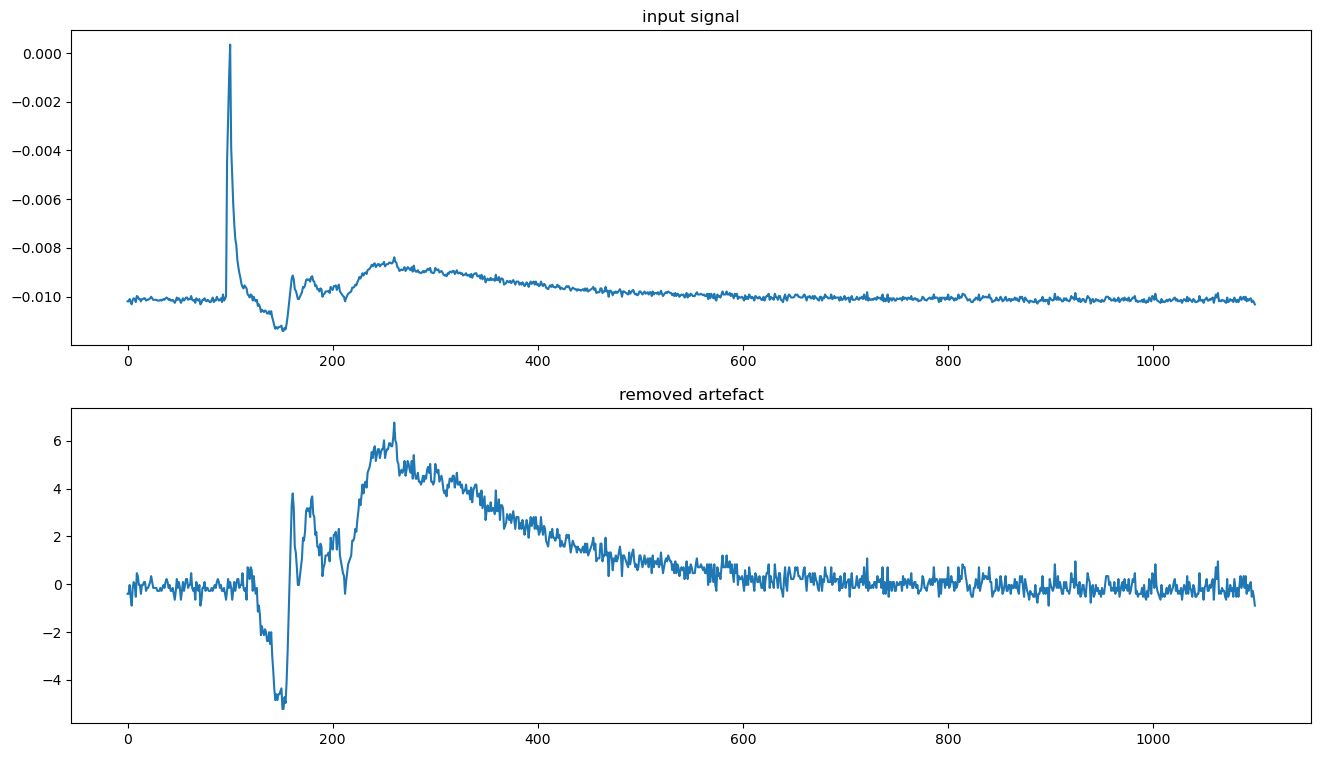

In [241]:
k = 3
plot(ca3100[k], norm_all_ca3100[k], center_ca3100)

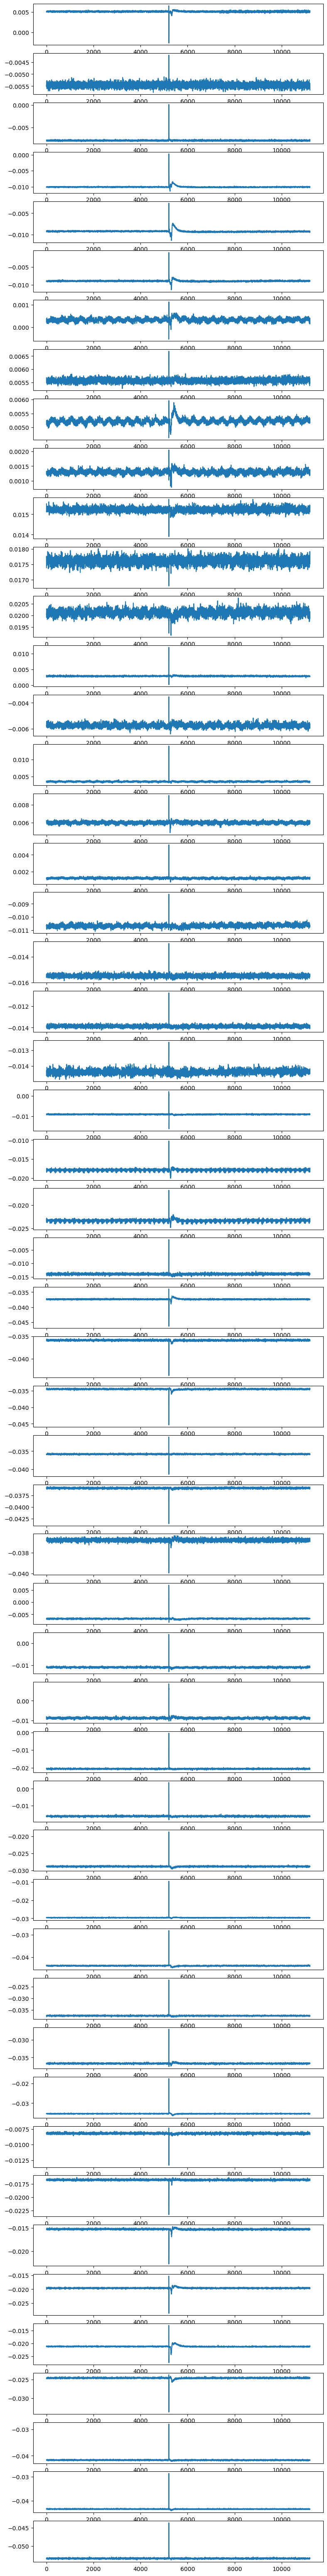

In [242]:
fig = plt.figure(figsize=(9, 80))

for i in range(52):
    
    ax = fig.add_subplot(52, 1, i+1)
    ax.plot(ca3100[i])
    

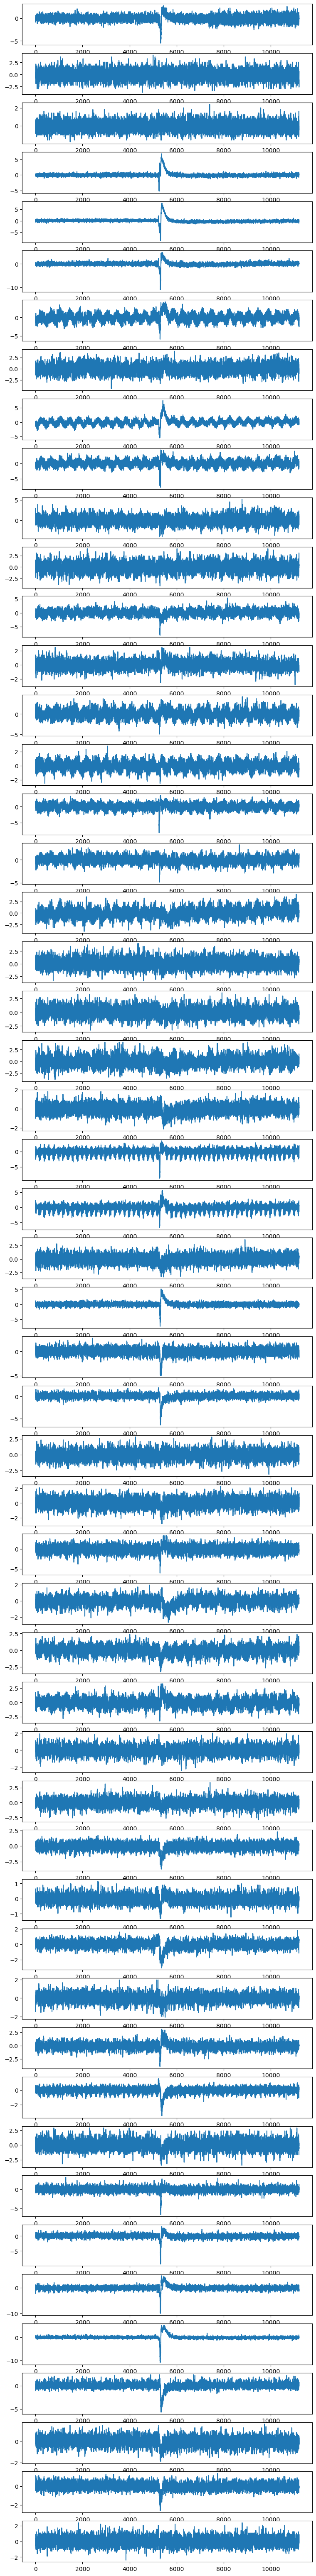

In [243]:
fig = plt.figure(figsize=(9, 80))

for i in range(52):
    
    ax = fig.add_subplot(52, 1, i+1)
    ax.plot(norm_all_ca3100[i])
    

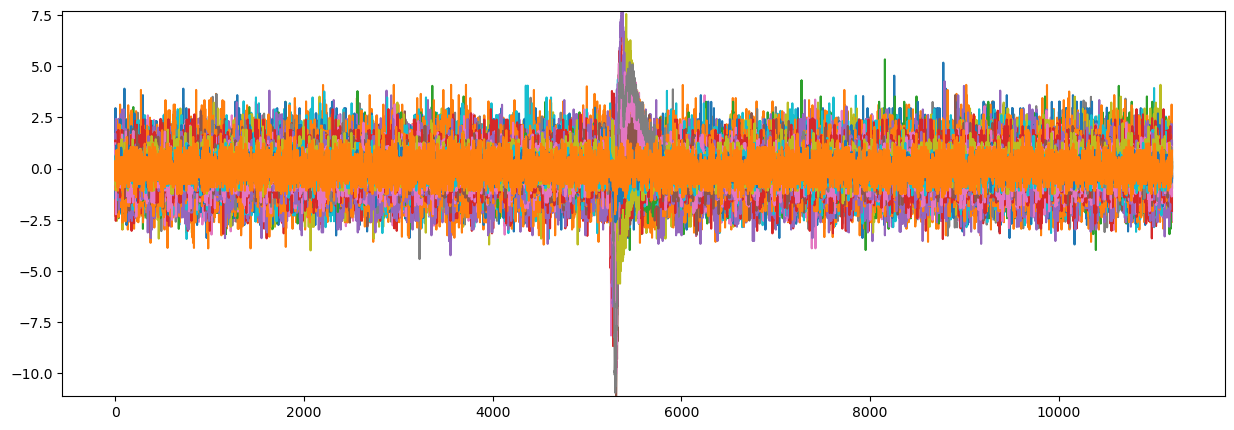

In [244]:
plt.figure(figsize=(15, 5))
plt.ylim([np.min(norm_all_ca3100), np.max(norm_all_ca3100)])

for i in range(52):
    plt.plot(norm_all_ca3100[i])
plt.show()

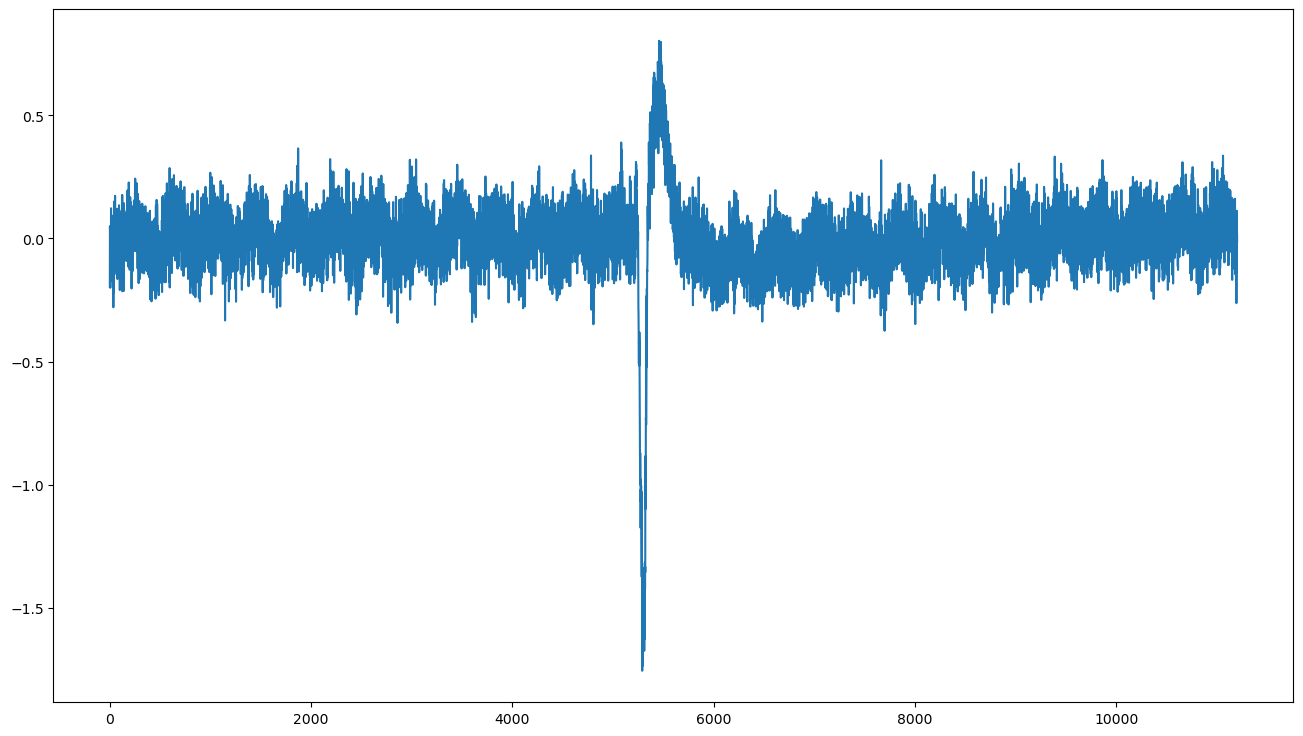

In [245]:
plt.figure(figsize=(16, 9))
plt.plot(norm_all_ca3100.mean(axis=0))

In [258]:
y = norm_all_ca3100[:, center_ca3100-400:center_ca3100 + 400]
x = list(range(800))
x = np.array(x) / 800
x = np.expand_dims(x, axis=1)

poly = PolynomialFeatures(degree=20)
X_poly = poly.fit_transform(x).astype("float16")

preds = np.zeros((800, 1))
for i in range(len(y)):
    lin2 = LinearRegression()
    poly.fit(X_poly, y[i])
    lin2.fit(X_poly, np.expand_dims(y[i], axis=1))
    preds += lin2.predict(X_poly)
preds /= len(y)

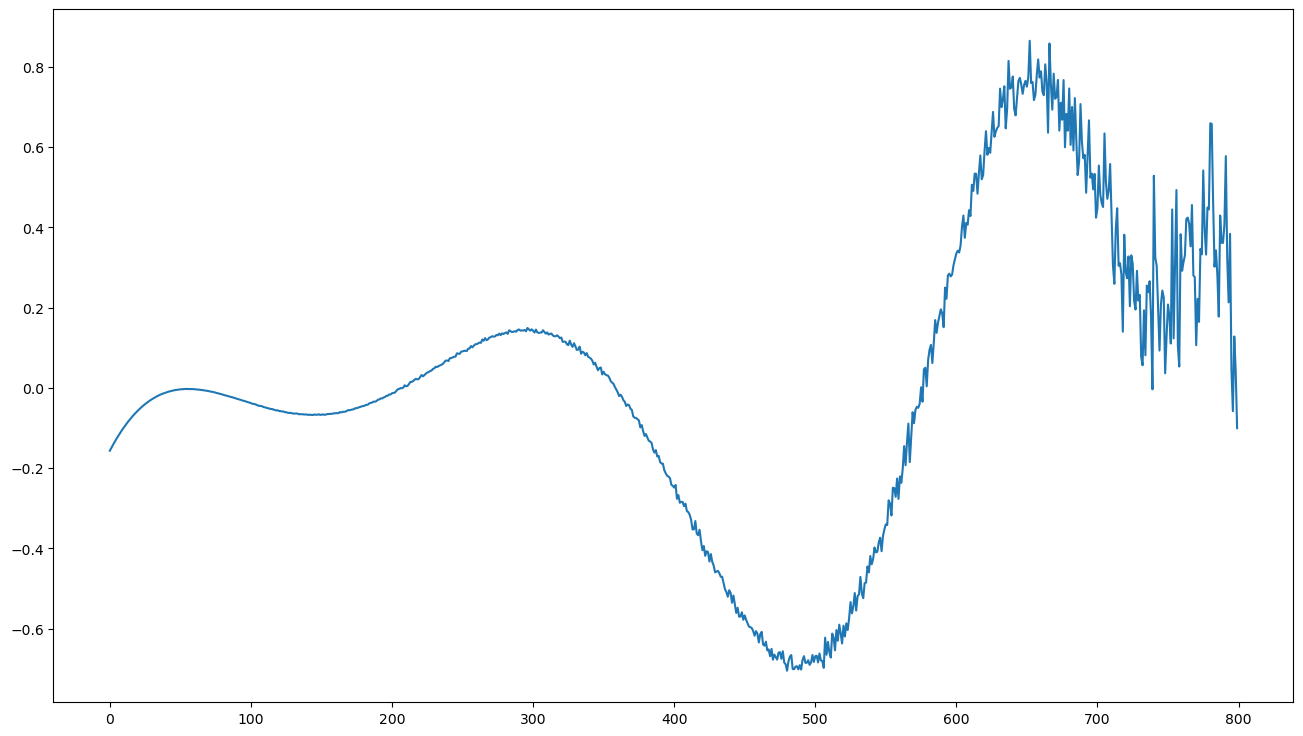

In [259]:
plt.figure(figsize=(16, 9))
plt.plot(preds)

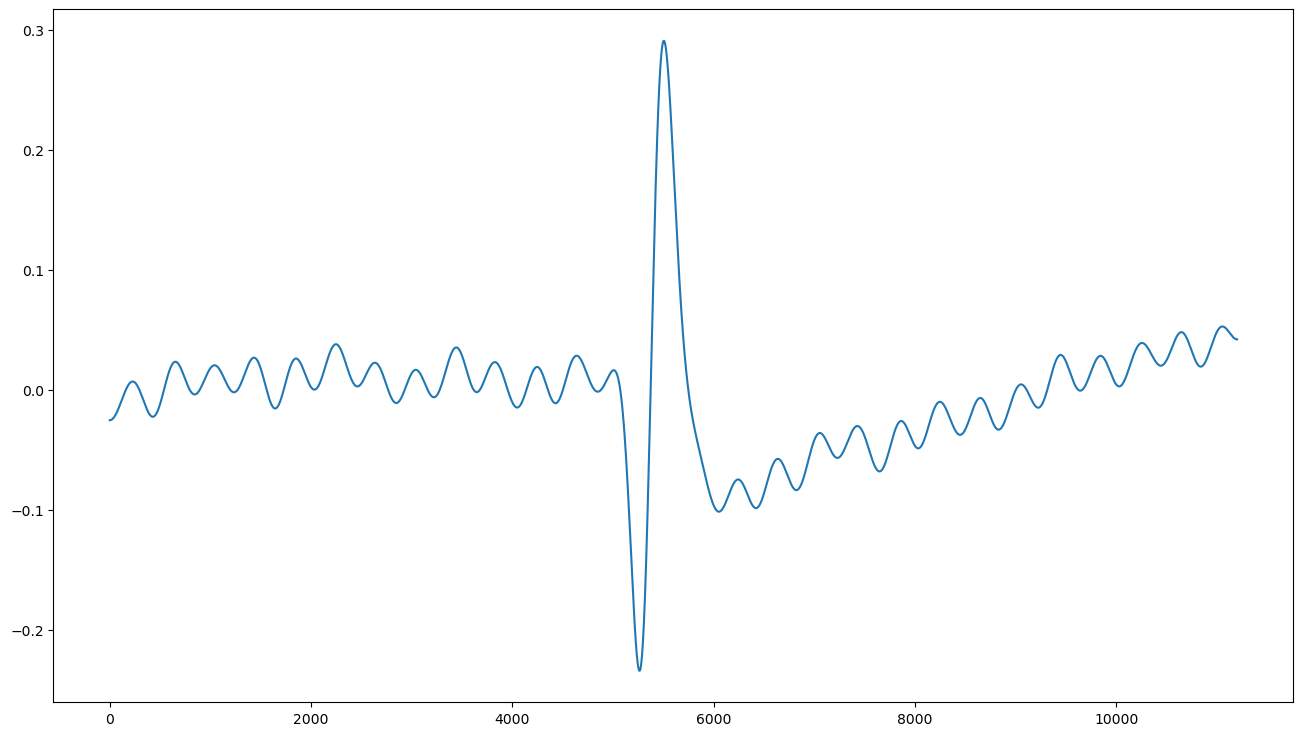

In [260]:
preds[700:] = gaussian_filter(preds[700:], sigma=5, radius=50)
mean_signal_ca3 = norm_all_ca3100.mean(axis=0)

fil_mean_signal = gaussian_filter(mean_signal_ca3, sigma=100, radius=400)

plt.figure(figsize=(16, 9))
plt.plot(fil_mean_signal)

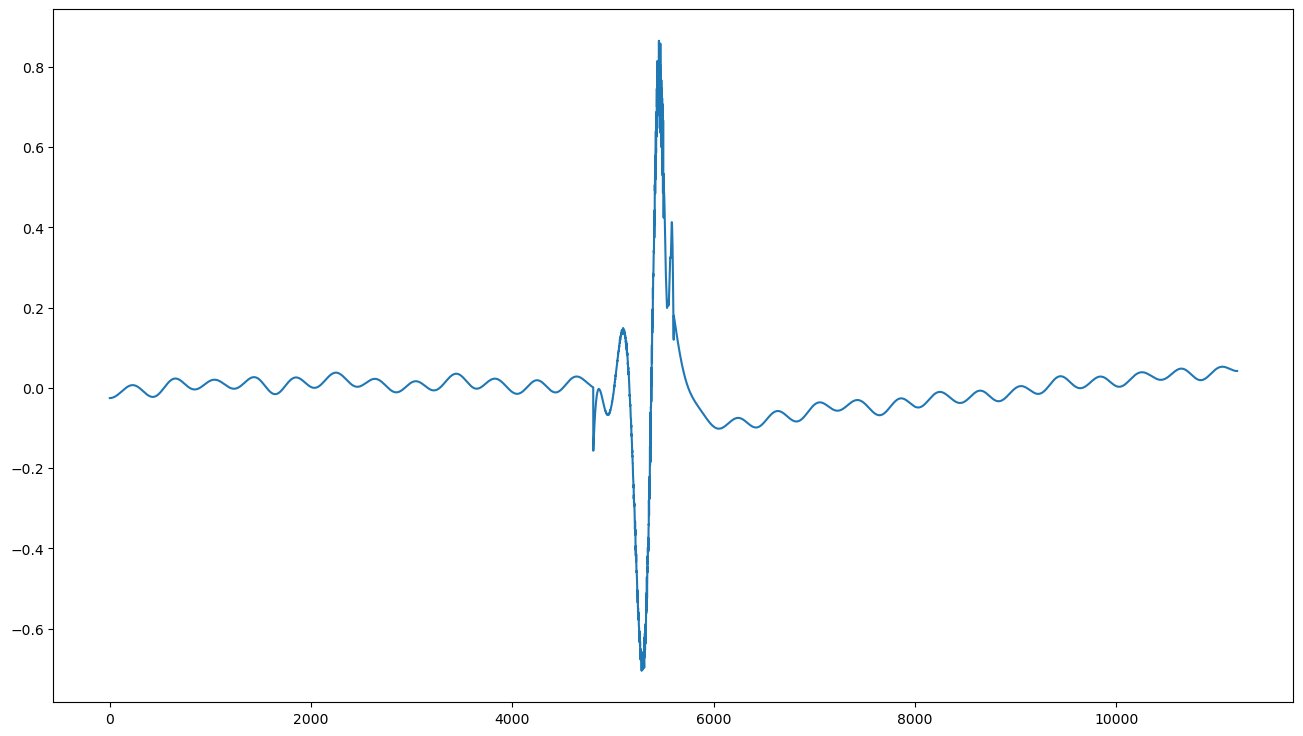

In [261]:
fil_mean_signal[center_ca3100-400:center_ca3100 + 400] = preds[:, 0]

plt.figure(figsize=(16, 9))
plt.plot(fil_mean_signal)

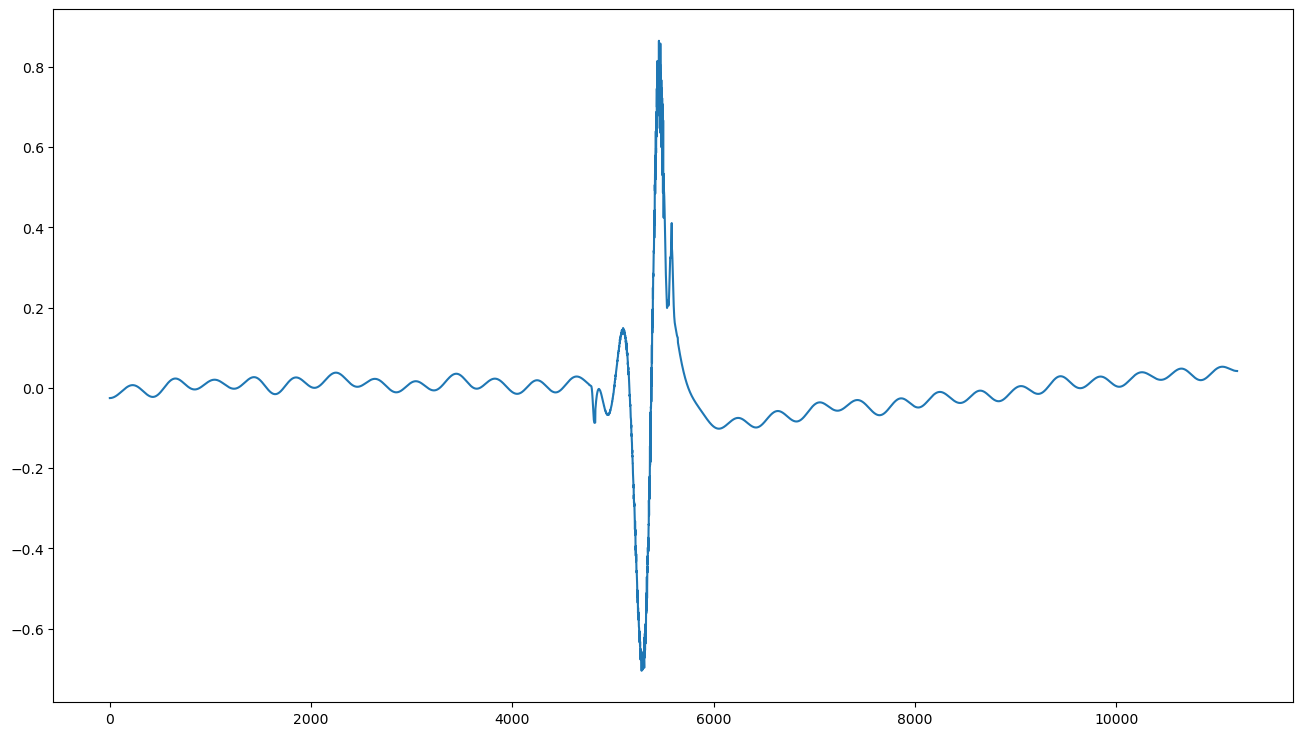

In [263]:
fil_mean_signal[center_ca3100-440:center_ca3100 - 380] = gaussian_filter(fil_mean_signal[center_ca3100-440:center_ca3100 - 380],
                                                                         sigma=20, radius=10)

fil_mean_signal[center_ca3100+380:center_ca3100 + 440] = gaussian_filter(fil_mean_signal[center_ca3100+380:center_ca3100 + 440],
                                                                         sigma=20, radius=10)

plt.figure(figsize=(16, 9))
plt.plot(fil_mean_signal)